## Bayesian Inference for a Proprtion


* Example: Tokyo Express customers' dining preference  
The owner wants to find out how popular is choice of Friday.


### Step 0: Import necesasry packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

### Step 1: Consider the percentage of customers' choice is Friday  
Before giving out the survey, let's consider the possible values and corresponding probablities of $p$

In [11]:
prior_values = np.array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
prior_probs = np.array([0.125, 0.125, 0.250, 0.250, 0.125, 0.125])

Note that probabilities are reasonable due to **Axioms of Probability**  
1. For any event $A$, $P(A) \in [0, 1]$
2. $P(U)=1$
3. If $A_i$ and $A_j$ are disjoint, $P(A_i \cup A_j)=P(A_i)+P(A_j)$

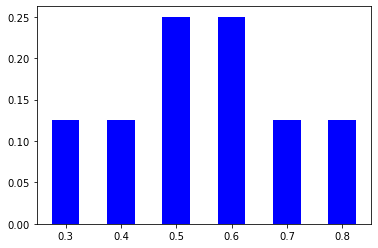

In [23]:

plt.bar(prior_values, prior_probs, color='blue', width=0.05)
plt.show()

### Step 2: Collect the data and Compute the likelihood of $p$  
Out of the 20 responses, 12 say that their favorite day for eating out for dinner is Friday.  
Quantitiy of interest: $p$, unknown, we're trying to make a inference about it!

In [24]:
n = 20
y = 12


* **The Binomial Distribution**  
1. One is repeating the same basic task $n$ times
2. 2 outcomes - *success* or *failure*
3. The probability of of *success* is always $p$
4. The results of outcomes from different trials are independent


Do you think that the survey is a Binomial Experiment?
1. 20 people
2. *success*: Choose Friday
3. For simplicity, let's assume that people answered independently

$$P(Y=k)={n \choose k}p^k(1-p)^{n-k}, k=0,...,n$$
* **Likelihood**  
a function of unknown quantity of interest. After collecting data, in this case,
$$L(p) = {20 \choose 12}p^k(1-p)^{n-k}$$
$Y:$ even though it is the random variable, but once we observed the data, it is now **fixed!**  

In Bayesian Inference, we assume that data is fixed and parameter is unknown. We only need $n, k$ and possible values of $p$ when computing the likelihood function. Note that we don't need $\pi_{\text{owner}}(p)$

In [25]:
likelihoods = binom.pmf(y, n, prior_values)

result = np.transpose(np.array([prior_values, prior_probs, likelihoods]))
df = pd.DataFrame(result, columns = ['p','prior','likelihood'])
print(df)

     p  prior  likelihood
0  0.3  0.125    0.003859
1  0.4  0.125    0.035497
2  0.5  0.250    0.120134
3  0.6  0.250    0.179706
4  0.7  0.125    0.114397
5  0.8  0.125    0.022161


### Step 3: Compute posterior distribution

$$\pi(p_i|y)=\frac{\pi(p_i) \times L(p)}{\sum_{j}{\pi(p_j) \times L(p_j)}}$$

In [30]:
products = likelihoods * prior_probs
sum_p = np.sum(products)
posterior_probs = products / sum_p

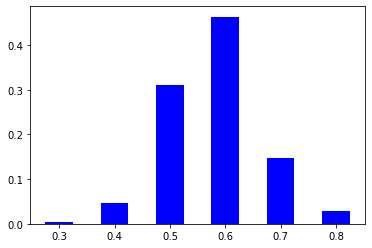

In [31]:
plt.bar(prior_values, posterior_probs, color='blue', width=0.05)
plt.show()

In [33]:
likelihoods = binom.pmf(y, n, prior_values)
result = np.transpose(np.array([prior_values, prior_probs, likelihoods, products, posterior_probs]))
df = pd.DataFrame(result, columns = ['p','prior','likelihood', 'product', 'posterior'])
print(df)

     p  prior  likelihood   product  posterior
0  0.3  0.125    0.003859  0.000482   0.004976
1  0.4  0.125    0.035497  0.004437   0.045768
2  0.5  0.250    0.120134  0.030034   0.309786
3  0.6  0.250    0.179706  0.044926   0.463401
4  0.7  0.125    0.114397  0.014300   0.147496
5  0.8  0.125    0.022161  0.002770   0.028573
